# Task2

Explore and prepare the dataset
First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task. 

Train a machine learning model
When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

Evaluate model and present findings
After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.


## Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.
We will use various packages for data manipulation, feature engineering and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#warnings.filterwarnings('always') #sets the filter to always show the warning, regardless of the warning type.
warnings.filterwarnings('ignore') #sets the filter to ignore all warnings.


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
# Any empty value in our dataset
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
booking=df['booking_complete']
df.drop(columns='booking_complete',axis=1,inplace=True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52


In [8]:
cat_df=[col for col in df.columns if (df[col].dtype=='object')]
num_df=[col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64')]
print(cat_df)
print(num_df)

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']


In [9]:
# describing Categorical columns
df[cat_df].describe()

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


In [10]:
# describing Numerical columns
df[num_df].describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [13]:
df[num_df].corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169
purchase_lead,0.212606,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000


In [78]:
df.groupby('num_passengers')['booking_complete'].value_counts()

num_passengers  booking_complete
1               0                   26897
                1                    4455
2               0                   10753
                1                    2051
3               0                    2450
                1                     491
4               0                    1509
                1                     275
5               0                     452
                1                     109
6               0                     235
                1                      54
7               0                      96
                1                      18
8               0                      77
                1                      12
9               0                      53
                1                      13
Name: count, dtype: int64

sales_channel  booking_complete
Internet       0                   37513
               1                    6869
Mobile         0                    5009
               1                     609
Name: count, dtype: int64


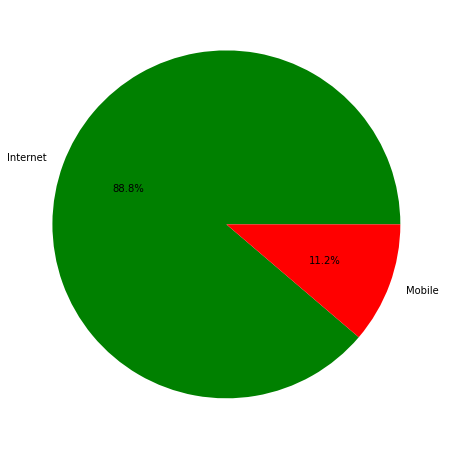

In [46]:
fig=plt.figure(figsize=(14,8),)
plt.pie(df['sales_channel'].value_counts(),labels=df['sales_channel'].unique(),autopct ='%1.1f%%',colors='green')
print(df.groupby('sales_channel')['booking_complete'].value_counts())

In [54]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [14]:
plt.figure(figsize=(14,8),)
sns.countplot(df['trip_type'],hue=df['booking_complete'],palette ='autumn',)
print(df.groupby('trip_type')['booking_complete'].value_counts())

KeyError: 'booking_complete'

<Figure size 1008x576 with 0 Axes>

([<matplotlib.patches.Wedge at 0xbaa597c6d0>,
 [Text(-0.9807965862040634, 0.4980341920897151, '0'),
  Text(0.9807966328333857, -0.49803410026090894, '1')],
 [Text(-0.5349799561113072, 0.2716550138671173, '85.0%'),
  Text(0.534979981545483, -0.2716549637786776, '15.0%')])

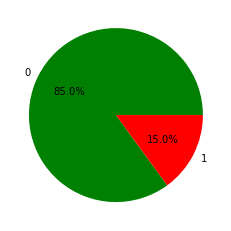

In [52]:
plt.pie(df['booking_complete'].value_counts(),labels=df['booking_complete'].unique(),autopct ='%1.1f%%',colors='green')

In [19]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [20]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(len(df[i].unique()))
    print("**********************************************************************")

num_passengers
[2 1 3 4 6 5 7 9 8]
9
**********************************************************************
sales_channel
['Internet' 'Mobile']
2
**********************************************************************
trip_type
['RoundTrip' 'CircleTrip' 'OneWay']
3
**********************************************************************
purchase_lead
[262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 157 145 241 139  59 396 280  79 380 132
 121 419  58 115 236 225 116 191 275 417 159  92 106 218 295  12 3

 4.72 8.15 6.33 5.   4.83 9.5  5.13]
21
**********************************************************************


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_df:
    df[i]=le.fit_transform(df[i])
df.head(20)


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52
5,1,0,2,3,48,20,4,0,61,1,0,1,5.52
6,3,0,2,201,33,6,4,0,61,1,0,1,5.52
7,2,0,2,238,19,14,1,0,36,1,0,1,5.52
8,1,0,2,80,22,4,1,0,61,0,0,1,5.52
9,1,1,2,378,30,12,3,0,36,0,0,0,5.52


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train,X_valid,y_train,y_valid = train_test_split(df,booking,test_size=0.2,random_state=22)

C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

algos = [LogisticRegression(), DecisionTreeRegressor(), RandomForestClassifier() ,KNeighborsRegressor()]

names = ['LogisticRegression', 'Decision Tree Regressor','RandomForestClassifier','KNeighborsRegressor']
rmse_list2=[]
roc_auc_list = []
for name in algos:
    model = name
    model.fit(Xtrain, ytrain)
    ypred = model.predict(Xvalid)
    ypred = np.where(ypred > 0.5, 1, 0)
    rc= roc_auc_score(yvalid, ypred)
    roc_auc_list.append(rc)
    print(name)
    print(classification_report(yvalid,ypred))
    MSE= metrics.mean_squared_error(yvalid,ypred)
    rmse = np.sqrt(MSE)
    rmse_list2.append(rmse)
    print(rmse)
   
evaluation2 = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list2})

In [27]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

for name in algos:
    model = name
    model.fit(Xtrain,ytrain)
    ypred = model.predict(Xvalid)
    MSE= metrics.mean_squared_error(yvalid,ypred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
   
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})
evaluation

,Model,RMSE
0,Linear Regression,0.351275
1,Ridge Regression,0.351275
2,Lasso Regression,0.356248
3,K Neighbors Regressor,0.368272
4,Decision Tree Regressor,0.470983


In [19]:
!pip install yellowbrick


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\DINU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DINU\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegre

LogisticRegression()
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8491
           1       0.00      0.00      0.00      1509

    accuracy                           0.85     10000
   macro avg       0.42      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000

0.38871583451153624


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

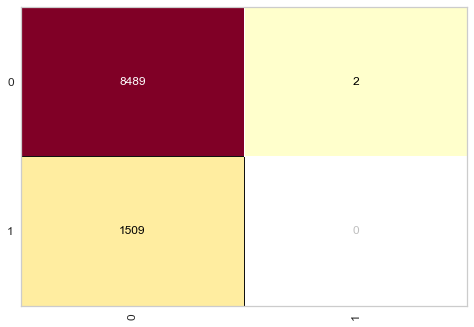

<Figure size 720x576 with 0 Axes>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

algos = [LogisticRegression(), DecisionTreeRegressor(), RandomForestClassifier() ,KNeighborsRegressor()]

names = ['LogisticRegression', 'Decision Tree Regressor','RandomForestClassifier','KNeighborsRegressor']
rmse_list2=[]
roc_auc_list = []
for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    rc= roc_auc_score(y_valid, y_pred)
    roc_auc_list.append(rc)
    print(name)
    print(classification_report(y_valid,y_pred))
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list2.append(rmse)
    print(rmse)
    
    cm = ConfusionMatrix(model, classes=[0,1])
    cm.fit(X_train, y_train)
    cm.score(X_valid, y_valid)
    
    plt.figure(figsize=(10,8))
    sorted_idx = model.feature_importances_.argsort()
    plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], model.feature_importances_[sorted_idx])
    plt.xlabel(f"{name} Feature Importance")
   
evaluation2 = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list2})




In [48]:
evaluation2

,Model,RMSE
0,LogisticRegression,0.388716
1,Decision Tree Regressor,0.468615
2,RandomForestClassifier,0.386523
3,KNeighborsRegressor,0.415211


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

algos = [, DecisionTreeRegressor(), RandomForestClassifier() ,KNeighborsRegressor()]

names = ['Decision Tree Regressor','RandomForestClassifier','KNeighborsRegressor']
rmse_list2=[]
roc_auc_list = []
for name in algos:
    model = name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    rc= roc_auc_score(y_valid, y_pred)
    roc_auc_list.append(rc)
    print(name)
    print(classification_report(y_valid,y_pred))
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list2.append(rmse)
    print(rmse)
    
    cm = ConfusionMatrix(model, classes=[0,1])
    cm.fit(X_train, y_train)
    cm.score(X_valid, y_valid)
    
    plt.figure(figsize=(10,8))
    sorted_idx = model.feature_importances_.argsort()
    plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], model.feature_importances_[sorted_idx])
    plt.xlabel(f"{name} Feature Importance")
   
evaluation2 = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list2})




C:\Users\DINU\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeRegressor()
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      8491
           1       0.29      0.32      0.30      1509

    accuracy                           0.78     10000
   macro avg       0.58      0.59      0.59     10000
weighted avg       0.79      0.78      0.78     10000

0.4722287581247038


YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [60]:
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

data.drop(columns=['route','booking_origin'],inplace=True)

booking=data['booking_complete']
data.drop(columns='booking_complete',axis=1,inplace=True)

cat_df=[col for col in data.columns if (data[col].dtype=='object')]
num_df=[col for col in data.columns if (data[col].dtype=='int64')]
print(cat_df)
print(num_df)


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_df:
    data[i]=le.fit_transform(data[i])
data.head(20)



X_train,X_test,y_train,y_test = train_test_split(data,booking,test_size=0.2,random_state=22)

['sales_channel', 'trip_type', 'flight_day']
['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']


In [61]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = logreg.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy:  0.8491
Precision:  0.0
Recall:  0.0
F1 score:  0.0


In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model
rf = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
MSE= metrics.mean_squared_error(yvalid,ypred)
rmse = np.sqrt(MSE)
rmse_list2.append(rmse)
print(rmse)

Accuracy:  0.8466
Precision:  0.4371859296482412
Recall:  0.05765407554671968
F1 score:  0.10187353629976581


In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = knn.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
MSE= metrics.mean_squared_error(yvalid,ypred)
rmse = np.sqrt(MSE)
rmse_list2.append(rmse)
print(rmse)

Accuracy:  0.8167
Precision:  0.26453488372093026
Recall:  0.12060967528164347
F1 score:  0.16568047337278108


In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
from sklearn.svm import SVC

# Create an instance of the model
svm = SVC(kernel='linear')

# Fit the model to the training data
svm.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = svm.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))\
MSE= metrics.mean_squared_error(yvalid,ypred)
rmse = np.sqrt(MSE)
rmse_list2.append(rmse)
print(rmse)

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = nb.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
MSE= metrics.mean_squared_error(yvalid,ypred)
rmse = np.sqrt(MSE)
rmse_list2.append(rmse)
print(rmse)

In [ ]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")